# Artificial Intelligence CEP  
### 8 Queens Problem Solver  
**Submitted by:**  
- Moiz Haider (CS23137)  
- Sufyan Ali (CS23134)
- Ammar Tariq (CS23132)
- Prem Sagar (CS23142)    

**Submitted To:** Dr. Maria Waqas  
 
---

### 🎯 Objective:
Solve the 8-Queens problem using two different AI approaches:  
1. Local Search (Min-Conflicts or Hill Climbing)  
2. Constraint Satisfaction Problem (CSP) using Backtracking with heuristics  

---



In [11]:
# =====================================================
# Imports
# =====================================================

import random
import time
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional

# Optional: make plots look nicer
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (4, 4)


## Problem Definition

**8 Queens Problem:**  
Place 8 queens on a chessboard such that no two queens attack each other.  
Queens attack along:
- Same **row**
- Same **column**
- Same **diagonal**

---

### State Representation:
We represent the board as a *list of length 8* where each index represents a column,  
and the value represents the row of the queen in that column.

Example:


In [12]:
# =====================================================
# Helper Functions
# =====================================================

def generate_random_state(n: int = 8) -> list:
    """Generate a random board with one queen per column."""
    return [random.randrange(n) for _ in range(n)]

def conflicts(state: list) -> int:
    """Count number of conflicting pairs of queens."""
    n = len(state)
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j]:
                count += 1  # same row
            elif abs(state[i] - state[j]) == abs(i - j):
                count += 1  # same diagonal
    return count

def display_board(state: list):
    """Display chessboard with queens (no colors)."""
    n = len(state)
    fig, ax = plt.subplots()

    # Draw grid boxes (white background, black border)
    for row in range(n):
        for col in range(n):
            rect = plt.Rectangle((col, row), 1, 1, fill=False, edgecolor='black', linewidth=1)
            ax.add_patch(rect)

    # Place queens centered inside boxes
    for c, r in enumerate(state):
        ax.text(c + 0.5, r + 0.5, "♛", fontsize=32, ha="center", va="center")

    # Board settings
    ax.set_xlim(0, n)
    ax.set_ylim(0, n)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    ax.set_title(f"Board (Conflicts = {conflicts(state)})")

    plt.show()


Random State: [1, 6, 2, 6, 0, 0, 4, 2]
Conflicts: 6


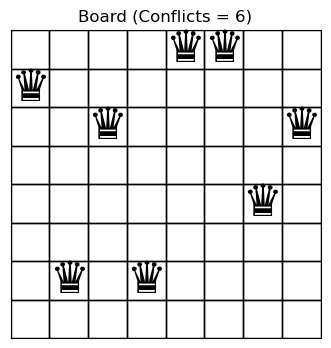

In [16]:
state = generate_random_state(8)
print("Random State:", state)
print("Conflicts:", conflicts(state))
display_board(state)


## Algorithm 1: Hill-Climbing (Local Search)

**Idea:**  
Start from a random board and iteratively move towards a better (lower-conflict) board  
by changing the position of queens one by one.

If no better move is possible, we may be stuck in a **local minimum** (not global best).  
To overcome that, we perform **random restarts** — i.e., start again from a new random board.

---

### Steps:
1. Start with a random arrangement of queens.
2. Calculate total number of conflicts.
3. For every possible single move (move one queen to another row in its column):
   - Check if conflicts decrease.
4. Move to the state with **minimum conflicts**.
5. If no improvement → local minimum → restart randomly.
6. Continue until solution found or maximum restarts reached.

### Characteristics:
- **Type:** Local search (uses heuristic = number of conflicts)
- **Completeness:** No (can get stuck)
- **Optimality:** No
- **Efficiency:** Very fast for small boards like 8-Queens


In [14]:
def hill_climbing(max_restarts=50, n=8):
    """Hill-Climbing with Random Restarts for N-Queens."""
    
    def best_neighbor(state):
        """Generate the best neighbor with lowest conflicts."""
        n = len(state)
        best = state[:]
        best_conf = conflicts(state)
        
        # Try all possible single moves
        for col in range(n):
            for row in range(n):
                if row != state[col]:  # skip same row
                    new_state = state[:]
                    new_state[col] = row
                    new_conf = conflicts(new_state)
                    if new_conf < best_conf:
                        best, best_conf = new_state, new_conf
        return best, best_conf
    
    for restart in range(max_restarts):
        state = generate_random_state(n)
        current_conf = conflicts(state)
        
        while True:
            neighbor, neighbor_conf = best_neighbor(state)
            if neighbor_conf >= current_conf:  # no better neighbor
                break
            state, current_conf = neighbor, neighbor_conf
            if current_conf == 0:  # goal reached
                return state, True, restart
    
    # No solution found after all restarts
    return state, False, max_restarts


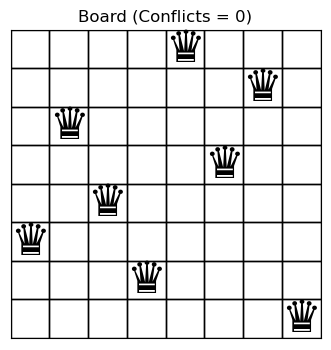

✅ Hill-Climbing Result:
Success: True
Restarts used: 3
Conflicts in final board: 0


In [15]:
# =====================================================
# Test: Hill-Climbing with Random Restarts
# =====================================================

solution, success, restarts_used = hill_climbing(max_restarts=100, n=8)

display_board(solution)
print("✅ Hill-Climbing Result:")
print("Success:", success)
print("Restarts used:", restarts_used)
print("Conflicts in final board:", conflicts(solution))
